# Contrôle du vna (ZND Rohde&Schwarz)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyvisa
rm = pyvisa.ResourceManager()
znd=rm.open_resource('znd')

In [3]:
# Check connection
znd.query('*IDN?')

'Rohde-Schwarz,ZND-2Port,1328517092100798,2.70\n'

## Récupération de la trace active

In [4]:
# Span
channel = 1
start = float(znd.query(f"SENS{channel}:FREQ:STAR?"))
stop = float(znd.query(f"SENS{channel}:FREQ:STOP?"))
npoints = int(znd.query(f"SENS{channel}:SWE:POIN?"))
freq = np.linspace(start,stop,npoints)

In [5]:
# Format binaire
znd.write("FORM REAL ,32")

15

In [6]:
# Trace active
data = znd.query_binary_values(f'CALC{channel}:DATA? SDAT',container=np.ndarray)
Sij = data.view(np.complex64)

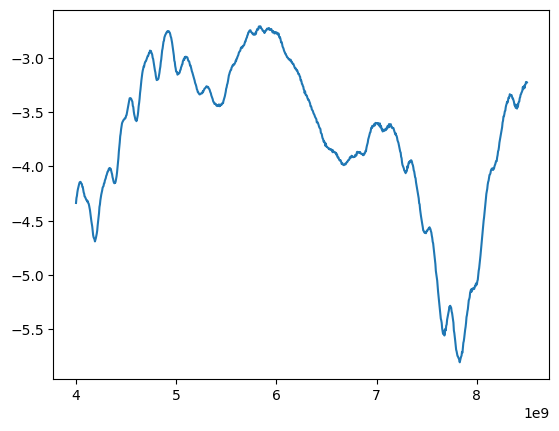

In [7]:
plt.plot(freq,20*np.log10(abs(Sij)))